# Extract the values from the .txt file

### 1.1 Data extraction

In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

airfoils = ["SC(2)-0714", "NACA2210", "NACA2312", "NACA65(1)-212"]
machs = ["77", "02"]

airfoils_name = sorted(["SC(2)-0714", "NACA 2210", "NACA 2312", "NACA 65(1)-212"])

naca_digits = 4
titles = 10


In [6]:
for file in os.listdir("airfoils\\raw_data"):
    new_name = file[:3]
    print(file)
    #os.rename()

M02_NACA2210.txt
M02_NACA2312.txt
M02_NACA65(1)-212.txt
M02_SC(2)-0714.txt
M77_NACA2210.txt
M77_NACA2312.txt
M77_NACA65(1)-212.txt
M77_SC(2)-0714.txt


### 1.2 <span style="color:white">  Create CSV files for all the airfoils and mach numbers in the lists</span>.

In [7]:
for airfoilname in airfoils:
    for M in machs:

        filename = "airfoils/raw_data/M" + M + "_" + airfoilname + ".txt" # this file is the main file
        csv_file = "airfoils/csv/M" + M + "_" + airfoilname + ".csv"
        graphsave = "airfoils/graphs/" + airfoilname + M + ".svg"
        print(filename)
        with open(filename, 'r') as file:
            lines = file.readlines()
            columns = lines[titles-1].strip().split()

            lst = []
            for line in lines[11:]:
                line = line.strip().split()
                lst.append(line)  
                

        with open(csv_file, 'w') as f:
            csv_writer = csv.writer(f)
            csv_writer.writerow(columns)
            csv_writer.writerows(lst)
            
files = os.listdir("airfoils/csv")

airfoils/raw_data/M77_SC(2)-0714.txt
airfoils/raw_data/M02_SC(2)-0714.txt
airfoils/raw_data/M77_NACA2210.txt
airfoils/raw_data/M02_NACA2210.txt
airfoils/raw_data/M77_NACA2312.txt
airfoils/raw_data/M02_NACA2312.txt
airfoils/raw_data/M77_NACA65(1)-212.txt
airfoils/raw_data/M02_NACA65(1)-212.txt


## 2. Analyse airfoils for each value

## 2.1 Graph CL - $\alpha$ curves for the four airfoils

### 2.1.1 Mach 0.2

### 2.2.2 Mach 0.7

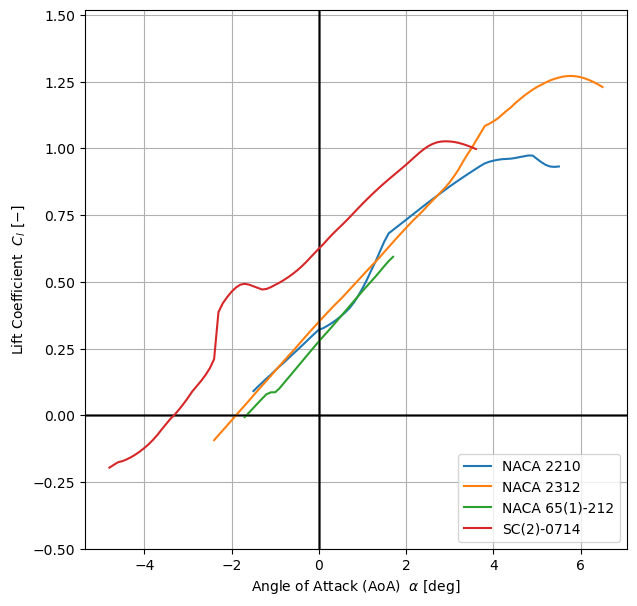

<Figure size 640x480 with 0 Axes>

In [8]:
fig, axs = plt.subplots(figsize=(7, 7))

for index, file in enumerate(files[4:]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    
    max_index = df["CL"].idxmax()
  
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    axs.set_ylim(-.5, 1.52)
    #axs.set_title(f'{file[:-4]}')
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"], df["CL"], label = airfoils_name[index])

axs.legend(loc="lower right")

plt.savefig("airfoils/graphs/M07_CL-alpha.svg")
#plt.tight_layout()
plt.show()
plt.clf()


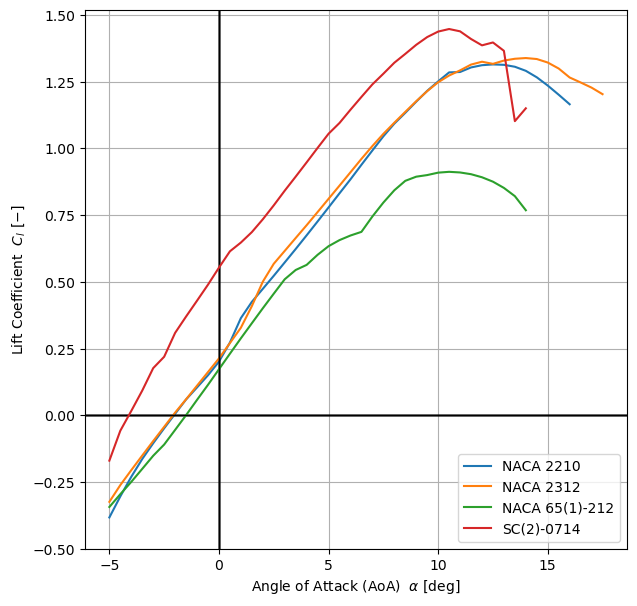

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axs = plt.subplots(figsize=(7, 7))

for index, file in enumerate(files[:4]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    
    max_index = df["CL"].idxmax()
  
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    
    #axs.set_title(f'{file[:-4]}')
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    axs.set_ylim(-.5, 1.52)
    
    axs.plot(df["alpha"], df["CL"], label = airfoils_name[index])

axs.legend(loc="lower right")

#plt.savefig("airfoils/graphs/M02_CL-alpha.svg")
#plt.tight_layout()
plt.show()
plt.clf()

## 2.2 Graph $C_l$ - $c_d$ curves for the four airfoils

['M02_NACA2210.csv', 'M02_NACA2312.csv', 'M02_NACA65(1)-212.csv', 'M02_SC(2)-0714.csv']
35
1.315
36
1.3389
31
0.9125
31
1.4477


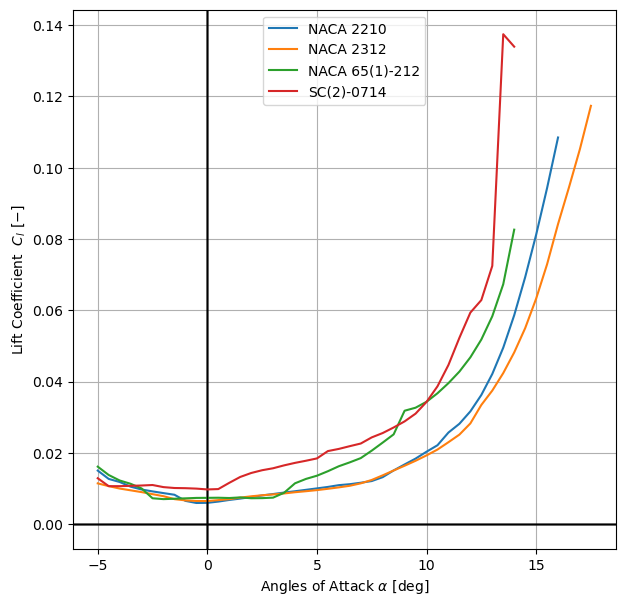

<Figure size 640x480 with 0 Axes>

In [16]:
fig, axs = plt.subplots(figsize=(7, 7))
print(files[:4])
for index, file in enumerate(files[:4]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    
    max_index = df["CL"].idxmax()
    print(max_index)
    print(df["CL"][max_index])
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r'Angles of Attack $\alpha \ [\deg]$')
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    

    axs.plot(df["alpha"], df["CD"], label = airfoils_name[index])

axs.legend()

plt.savefig("airfoils/graphs/M07_Cd-alpha.svg")
#plt.tight_layout()
plt.show()
plt.clf()

## 2.3 DATCOM method to find the linear part of the graph

NameError: name 'airfoils_maxcl' is not defined

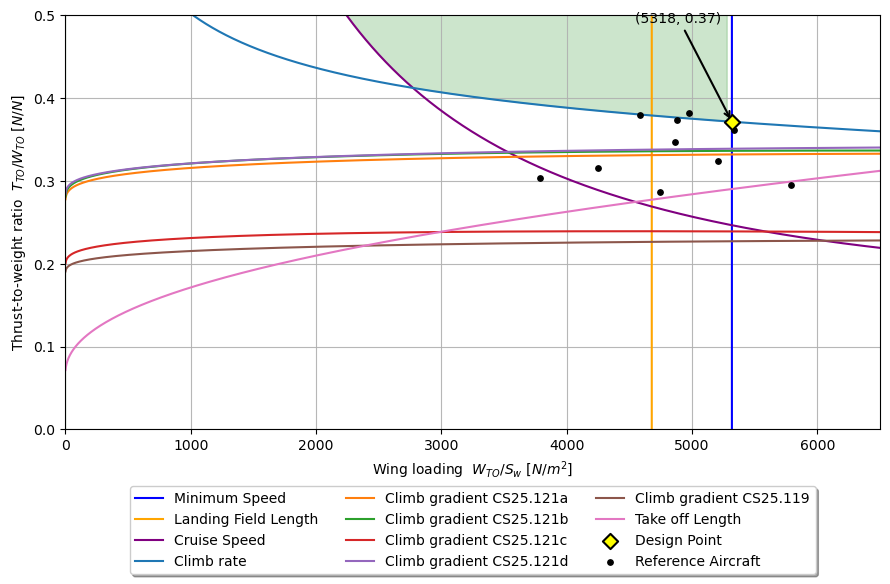

In [11]:
from planform import AR, halveCordSweep, V_cr
beta = np.sqrt(1-V_cr**2)
eta = 0.95
alpha_0l = np.radians(-2.0)
cl_max = airfoils_maxcl[-1]



alphas = np.radians(np.linspace(-5, 20))
dclalpha = 2*np.pi*AR/(2+np.sqrt(4+((AR*beta/eta)**2))*(1+((np.tan(halveCordSweep))**2)/(beta**2)))

print(dclalpha*np.pi/180)
print("dclalpha = "+ str(dclalpha) + "  [1/rad]")

CL = dclalpha*(alphas-alpha_0l)
x = np.degrees(alphas)

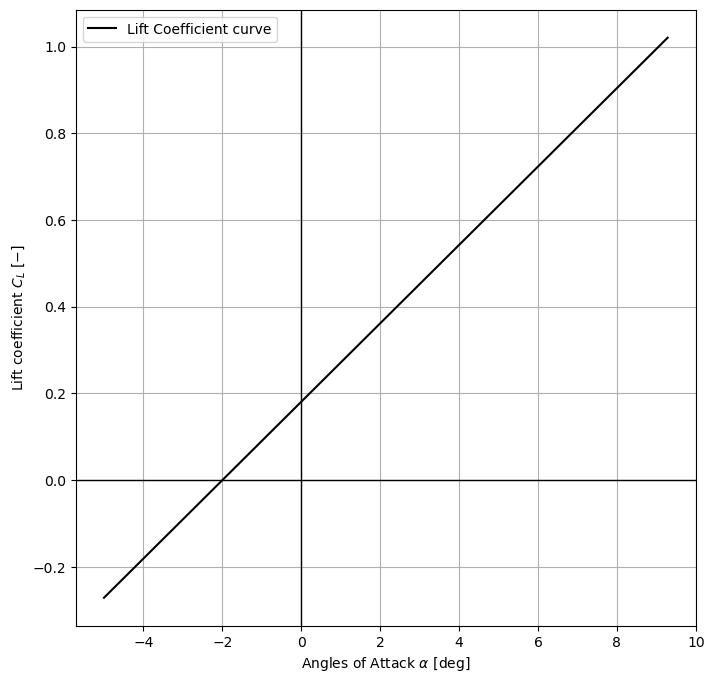

<Figure size 640x480 with 0 Axes>

In [106]:
fig, axs = plt.subplots(figsize=(8, 8))
axs.grid(True)
axs.axhline(linewidth=1, color="k")
axs.axvline(linewidth=1, color="k")
df = pd.DataFrame(x[:29], CL[:29])

axs.plot(x[:28+1], CL[:28+1], color='black', label = r'Lift Coefficient curve')
axs.set_xlabel(r'Angles of Attack $\alpha \ [\deg]$')
axs.set_ylabel(r'Lift coefficient $C_L \ [-]$')
plt.legend()
plt.show()
plt.clf()


NameError: name 'files' is not defined

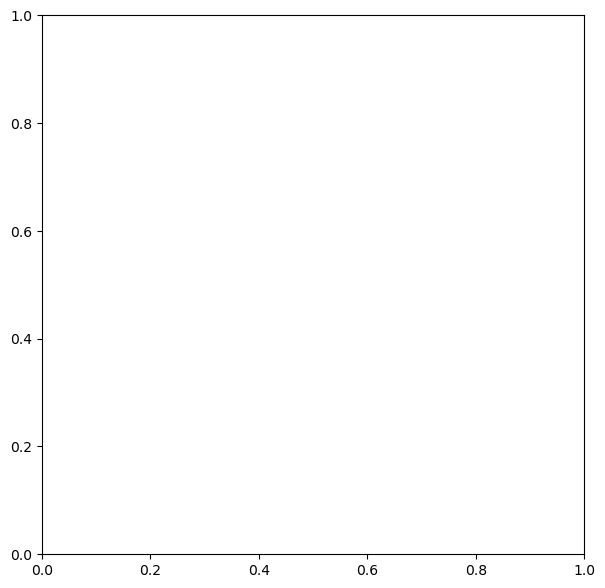

In [2]:
fig, axs = plt.subplots(figsize=(7, 7))
print(files[4:])
for index, file in enumerate(files[4:]):
    
    df = pd.read_csv(os.path.join("airfoils/csv", file))
    #max_index = df["CL"].idxmax()
    #df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Drag Coefficient  $C_d \ [-]$", fontsize = 10)
    
    #axs.set_title(f'{file[:-4]}')
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"][:20], df["CD"][:20], label = airfoils_name[index])

axs.legend()

#plt.savefig("airfoils/graphs/M07_CD-alpha.svg")
#plt.tight_layout()
plt.show()


In [108]:
import numpy as np
AR = 8.69
LE_sweep = np.radians(27.9)
e = 4.61 * (1 - 0.045 * AR**0.68) * (np.cos(LE_sweep)**0.15) - 3.1
e

0.5394168760899984